In [105]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(vioplot)
library(ascii)
library(corrplot)
library(descr)

In [1]:
state <- read.csv(file="./train_data/state.csv")

In [2]:
mean(state[["Population"]])

[1] 6162876

In [3]:
mean(state[["Population"]], trim=0.10)

[1] 4783697

In [4]:
median(state[["Population"]])

[1] 4436370

In [5]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [6]:
library("matrixStats")

Warning message:
"package 'matrixStats' was built under R version 3.6.3"

In [7]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

In [8]:
sd(state[["Population"]])

[1] 6848235

In [9]:
IQR(state[["Population"]])

[1] 4847308

In [11]:
mad(state[["Population"]])

[1] 3849870

In [13]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

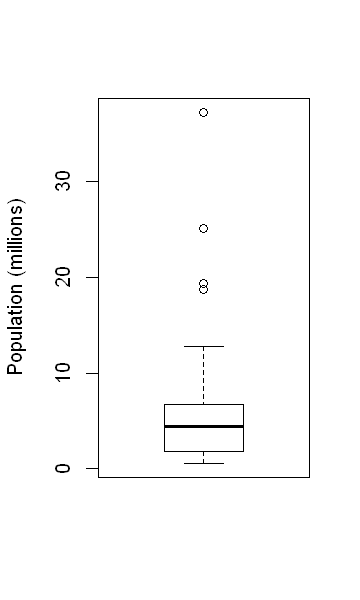

In [20]:
library(repr)
options(repr.plot.width=3, repr.plot.height=5)
# https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
boxplot(state[["Population"]] / 1000000, ylab="Population (millions)")

In [23]:
breaks <- seq(from=min(state[["Population"]]), to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks, right=TRUE, include.lowest=TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

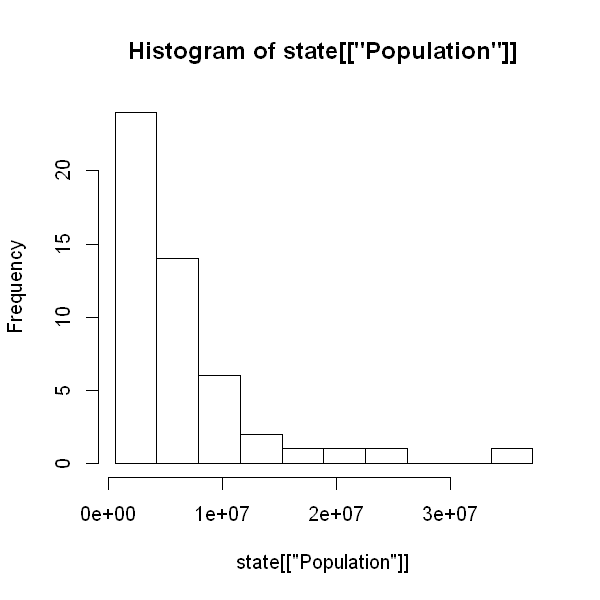

In [25]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)

hist(state[["Population"]], breaks=breaks)

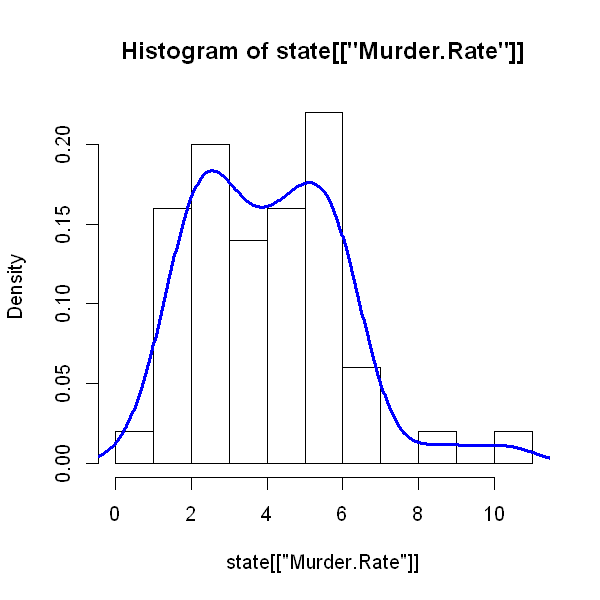

In [27]:
hist(state[["Murder.Rate"]], freq=FALSE)
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

In [32]:
dfw <- read.csv(file="./train_data/dfw_airline.csv")

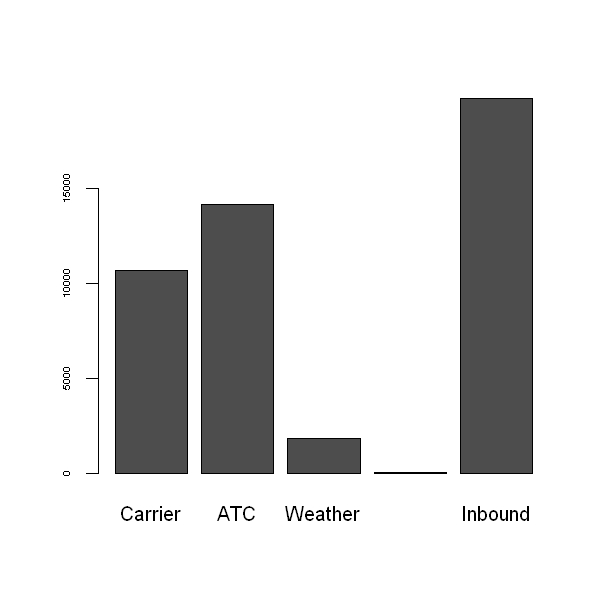

In [33]:
barplot(as.matrix(dfw) / 6, cex.axis=.5)

In [39]:
sp500_px <- read.csv(file="./train_data/sp500_data.csv")
sp500_sym <- read.csv(file="./train_data/sp500_sectors.csv")

In [111]:
sp500_sym[sp500_sym$sector=="etf", 'symbol']

[1] XLI QQQ SPY DIA GLD VXX USO IWM XLE XLY XLU XLB XTL XLV XLP XLF XLK
517 Levels: A AA AAL AAP AAPL ABBV ABC ABT ACE ACN ADBE ADI ADM ADP ADS ... ZTS

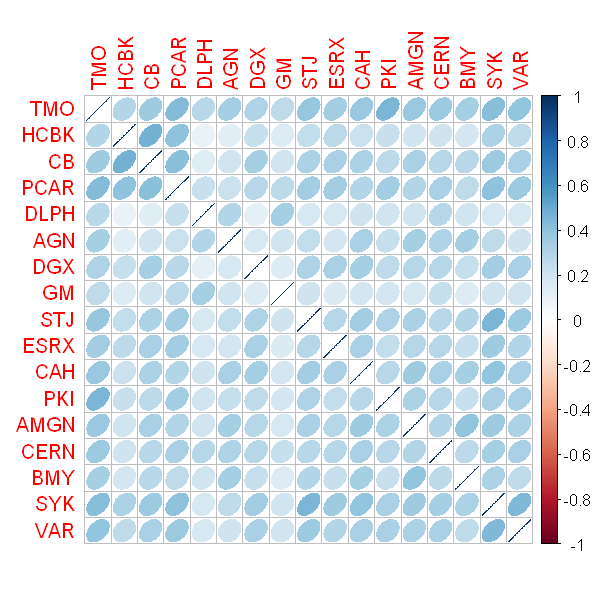

In [108]:
etfs <- sp500_px[row.names(sp500_px)>"2012-07-02",
                 sp500_sym[sp500_sym$sector=="etf", 'symbol']]
library(corrplot)
corrplot(cor(etfs), method="ellipse")

In [109]:
telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
telecom <- telecom[row.names(telecom)>"2012-07-01", ]

In [130]:
kc_tax <- read.csv(file="./train_data/kc_tax.csv")

In [121]:
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving > 100
                  & SqFtTotLiving < 3500)
nrow(kc_tax0)

[1] 432693

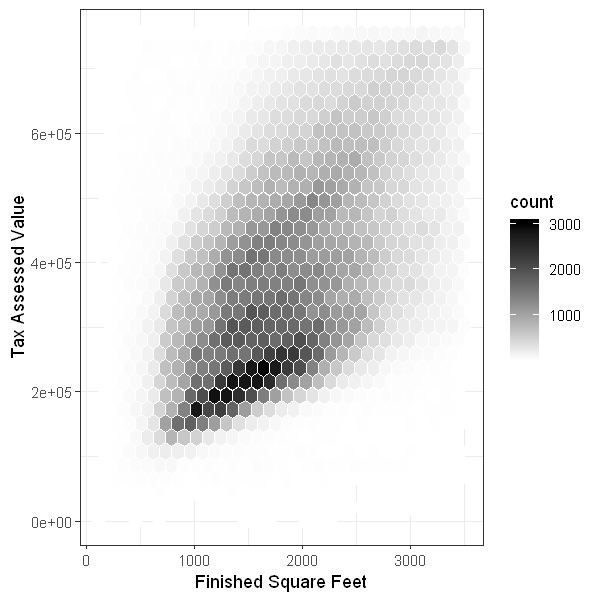

In [122]:
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) +
  stat_binhex(colour="white") + 
  theme_bw() +
  scale_fill_gradient(low="white", high="black") +
  labs(x="Finished Square Feet", y="Tax Assessed Value")

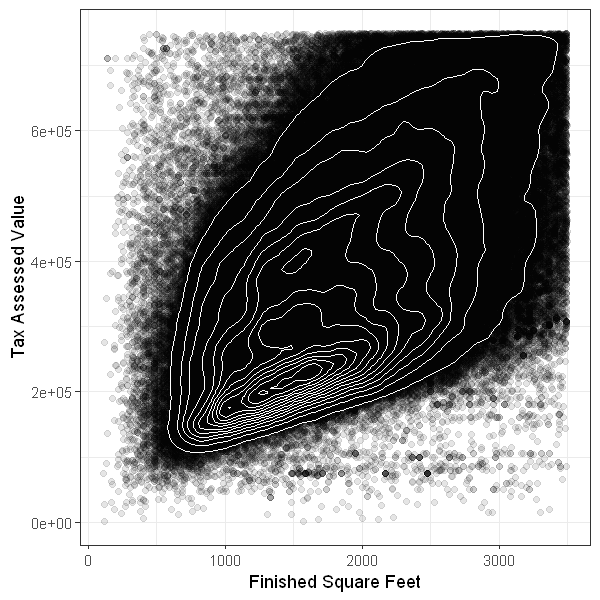

In [124]:
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
  theme_bw() +
  geom_point(alpha=0.1) +
  geom_density2d(colour="white") +
  labs(x="Finished Square Feet", y="Tax Assessed Value")

In [127]:
lc_loans <- read.csv(file="./train_data/lc_loans.csv")

In [128]:
library(descr)
x_tab <- CrossTable(lc_loans$grade, lc_loans$status,
                    prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

In [129]:
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid    Late    Total
---------------------------------------------------------------------
A                        1562     50051        20408     469    72490
                        0.022     0.690        0.282   0.006    0.161
---------------------------------------------------------------------
B                        5302     93852        31160    2056   132370
                        0.040     0.709        0.235   0.016    0.294
---------------------------------------------------------------------
C                        6023     88928        23147    2777   120875
                        0.050     0.736        0.191   0.023    0.268
---------------------------------------------------------------------
D                        5007     53281        13681    2308   

In [131]:
airline_stats <- read.csv(file="./train_data/airline_stats.csv")

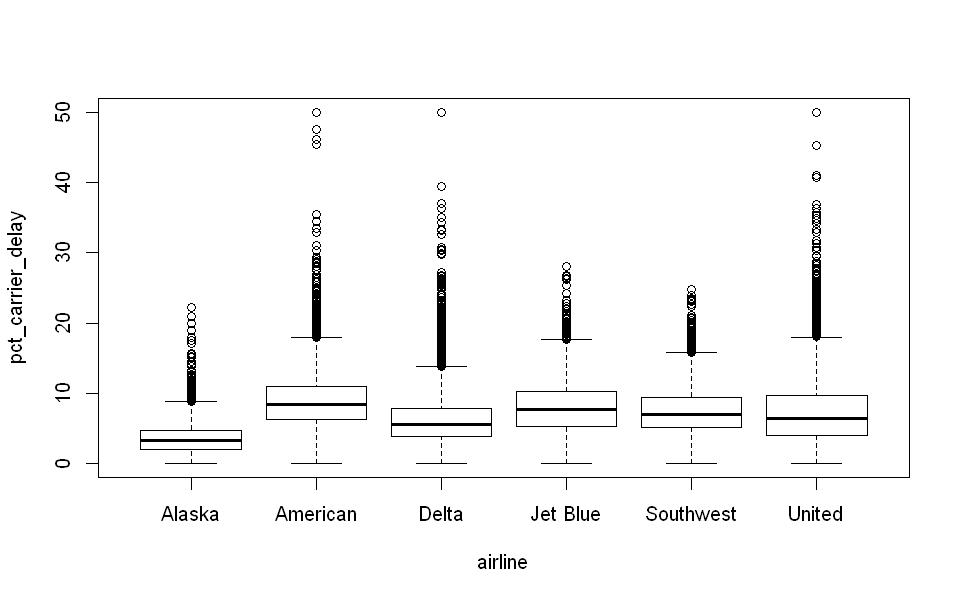

In [135]:
options(repr.plot.width=8, repr.plot.height=5)
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))

Warning message:
"Removed 38 rows containing non-finite values (stat_ydensity)."

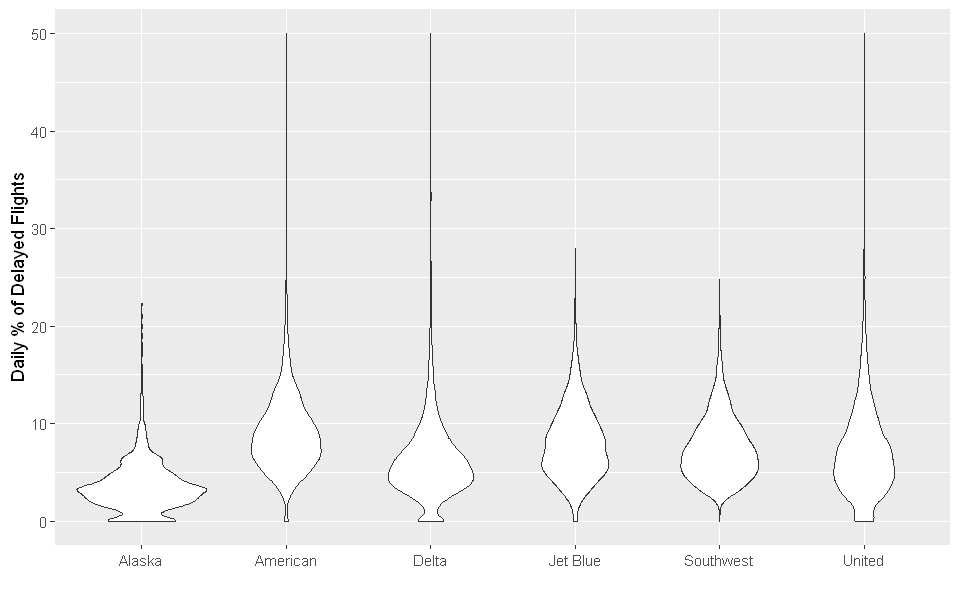

In [136]:
ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) + 
  ylim(0, 50) +
  geom_violin() +
  labs(x="", y="Daily % of Delayed Flights")

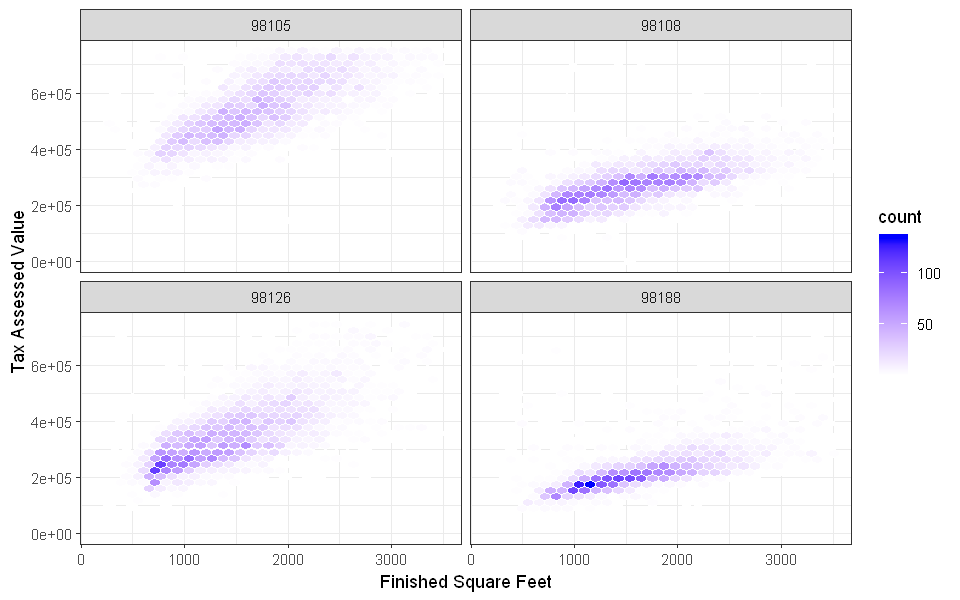

In [137]:
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
       aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
  stat_binhex(colour="white") +
  theme_bw() +
  scale_fill_gradient(low="white", high="blue") +
  labs(x="Finished Square Feet", y="Tax Assessed Value") +
  facet_wrap("ZipCode")